## 🔥 FRAP Data Description

Wildfires are among the most destructive natural disasters, causing widespread ecological and economic damage. As climate change continues to exacerbate the frequency and severity of these events, early identification of their causes becomes increasingly crucial. This project, conducted as part of my master's thesis, aims to develop a machine learning model to predict the cause of wildfires in the United States using historical data.

The prediction focuses on categorizing wildfire causes—such as human-related, lightning-induced, or unknown—based on a combination of structured and spatial features.

## 🎯 Objective

The primary objective of this project is to accurately **predict the cause of a wildfire** using features such as:

- Fire size and class  
- Date and time of discovery and containment  
- Geographic coordinates (latitude and longitude)  
- Reporting agency and ownership information  
- Location metadata (state, county, FIPS codes)  
- Cause-related metadata from the dataset

By identifying likely causes, this model can support government agencies and land managers in implementing more effective prevention strategies.

## 🗂️ Dataset Source

The dataset is sourced from the **U.S. Forest Service Fire Program Analysis Fire-Occurrence Database (FPA FOD)**. It is publicly available and provides a comprehensive record of wildfire incidents across the United States.

- **Source**: [U.S. Forest Service Research Data Archive](https://www.fs.usda.gov/rds/archive/catalog/RDS-2013-0009.5)  
- **Description**: Contains detailed attributes for wildfires reported by various agencies, including:
  - Fire discovery and containment details
  - Reporting unit and system information
  - Geographic and jurisdictional metadata
  - Fire size, class, and cause classifications
  - Geospatial geometry for mapping
  
The dataset consists of over 2 million individual wildfire records collected from multiple federal, state, and local fire management agencies.

## 🧠 Importance

Understanding the causes of wildfires can lead to:

- Improved prevention strategies
- Better allocation of firefighting resources
- More accurate risk assessments
- Enhanced public safety initiatives

By applying machine learning and geospatial analysis to this rich dataset, this project aims to produce actionable insights for mitigating wildfire risk across the U.S.

In [2]:
import geopandas as gpd
import fiona  # <-- direct import

file_path = r"C:\Users\annis\OneDrive\Desktop\California Wildfire\Data Files\FPA_FOD_20221014.gpkg"

# List all layers in the .gpkg
layers = fiona.listlayers(file_path)
# Load the most relevant layer (usually first or named like 'FPA_FOD_20221014')
gdf = gpd.read_file(file_path, layer=layers[0])

# Preview the data
print(gdf.head())


   FOD_ID      FPA_ID SOURCE_SYSTEM_TYPE SOURCE_SYSTEM NWCG_REPORTING_AGENCY  \
0       1  FS-1418826                FED   FS-FIRESTAT                    FS   
1       2  FS-1418827                FED   FS-FIRESTAT                    FS   
2       3  FS-1418835                FED   FS-FIRESTAT                    FS   
3       4  FS-1418845                FED   FS-FIRESTAT                    FS   
4       5  FS-1418847                FED   FS-FIRESTAT                    FS   

  NWCG_REPORTING_UNIT_ID  NWCG_REPORTING_UNIT_NAME SOURCE_REPORTING_UNIT  \
0                USCAPNF    Plumas National Forest                  0511   
1                USCAENF  Eldorado National Forest                  0503   
2                USCAENF  Eldorado National Forest                  0503   
3                USCAENF  Eldorado National Forest                  0503   
4                USCAENF  Eldorado National Forest                  0503   

  SOURCE_REPORTING_UNIT_NAME LOCAL_FIRE_REPORT_ID  ... FIRE_SI

## 🔍 Data Exploration and Preprocessing

The initial step in this project involved performing basic data mining tasks to understand the structure and quality of the dataset. Using `pandas` and `geopandas`, we examined the shape of the dataset to understand the number of records and features available for analysis. The `.shape` method revealed the dimensions of the dataset, while `.head()` provided a snapshot of the first few rows, allowing us to inspect data types, value distributions, and potential anomalies. Additionally, `.columns` was used to list all feature names, helping identify relevant variables for feature engineering and modeling. This preliminary exploration was essential in identifying null values, categorical variables, and geospatial features such as latitude, longitude, and geometry that would later play a key role in predictive modeling.


In [3]:
gdf.head()

,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,NWCG_REPORTING_UNIT_ID,NWCG_REPORTING_UNIT_NAME,SOURCE_REPORTING_UNIT,SOURCE_REPORTING_UNIT_NAME,LOCAL_FIRE_REPORT_ID,...,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_DESCR,STATE,COUNTY,FIPS_CODE,FIPS_NAME,geometry
0,1,FS-1418826,FED,FS-FIRESTAT,FS,USCAPNF,Plumas National Forest,0511,Plumas National Forest,1,...,0.10,A,40.036944,-121.005833,USFS,CA,63,06063,Plumas County,POINT (-121.00582 40.03694)
1,2,FS-1418827,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,13,...,0.25,A,38.933056,-120.404444,USFS,CA,61,06061,Placer County,POINT (-120.40443 38.93305)
2,3,FS-1418835,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,27,...,0.10,A,38.984167,-120.735556,STATE OR PRIVATE,CA,17,06017,El Dorado County,POINT (-120.73554 38.98416)
3,4,FS-1418845,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,43,...,0.10,A,38.559167,-119.913333,USFS,CA,3,06003,Alpine County,POINT (-119.91332 38.55916)
4,5,FS-1418847,FED,FS-FIRESTAT,FS,USCAENF,Eldorado National Forest,0503,Eldorado National Forest,44,...,0.10,A,38.559167,-119.933056,USFS,CA,3,06003,Alpine County,POINT (-119.93304 38.55916)


In [3]:
gdf.columns

Index(['FOD_ID', 'FPA_ID', 'SOURCE_SYSTEM_TYPE', 'SOURCE_SYSTEM',
       'NWCG_REPORTING_AGENCY', 'NWCG_REPORTING_UNIT_ID',
       'NWCG_REPORTING_UNIT_NAME', 'SOURCE_REPORTING_UNIT',
       'SOURCE_REPORTING_UNIT_NAME', 'LOCAL_FIRE_REPORT_ID',
       'LOCAL_INCIDENT_ID', 'FIRE_CODE', 'FIRE_NAME',
       'ICS_209_PLUS_INCIDENT_JOIN_ID', 'ICS_209_PLUS_COMPLEX_JOIN_ID',
       'MTBS_ID', 'MTBS_FIRE_NAME', 'COMPLEX_NAME', 'FIRE_YEAR',
       'DISCOVERY_DATE', 'DISCOVERY_DOY', 'DISCOVERY_TIME',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE',
       'NWCG_CAUSE_AGE_CATEGORY', 'CONT_DATE', 'CONT_DOY', 'CONT_TIME',
       'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'LATITUDE', 'LONGITUDE', 'OWNER_DESCR',
       'STATE', 'COUNTY', 'FIPS_CODE', 'FIPS_NAME', 'geometry'],
      dtype='object')

In [4]:
gdf.shape

(2303566, 38)

## 🕒 Date and Time Formatting

To prepare the dataset for temporal analysis, the `DISCOVERY_DATE`, `CONT_DATE`, `DISCOVERY_TIME`, and `CONT_TIME` fields were converted into consistent and usable datetime formats. The original date fields were stored in Julian date format, which required conversion into standard Python `datetime` objects using `pandas.to_datetime()` with appropriate transformations.These conversions allowed for the extraction of new temporal features such as the day of the week, month, hour of discovery, and time duration between discovery and containment, all of which_


In [ ]:
import pandas as pd
gdf['DISCOVERY_DATE'] = pd.to_datetime(gdf['DISCOVERY_DATE'])
gdf['DISCOVERY_DATE']

In [7]:
gdf['DISCOVERY_TIME'] = gdf['DISCOVERY_TIME'].apply(lambda x: str(x).zfill(4) if pd.notna(x) else '0000')

In [8]:
gdf.loc[:, 'DISCOVERY_TIME'] = pd.to_datetime(gdf['DISCOVERY_TIME'], format='%H%M', errors='coerce').dt.time
gdf['DISCOVERY_TIME']

0          13:00:00
1          08:45:00
2          19:21:00
3          16:00:00
4          16:00:00
             ...   
2303561    17:41:00
2303562    19:58:00
2303563    19:11:00
2303564    07:55:00
2303565    11:10:00
Name: DISCOVERY_TIME, Length: 2303566, dtype: object

## 🌎 Filtering Data for California and Selecting Relevant Features

Given the high frequency and severity of wildfires in California, the dataset was filtered to include only records where the `STATE` column was equal to `"CA"`. This localized focus enables a more region-specific analysis and increases the relevance and accuracy of the prediction model for California-based wildfire incidents. After filtering, a subset of columns was selected to form a new GeoDataFrame (`gdf_ca`) with the most relevant features for cause prediction:

- **Temporal features** like `DISCOVERY_DATE`, `DISCOVERY_TIME`, and `FIRE_YEAR` help identify seasonal and time-of-day patterns associated with different wildfire causes.

- **Geospatial data** such as `LATITUDE`, `LONGITUDE`, and `COUNTY` allow spatial analysis of fire hotspots and potential cause-specific clustering.

- **Fire size metrics**, including `FIRE_SIZE` and `FIRE_SIZE_CLASS`, provide insights into the scale of each incident, which may correlate with the type of ignition source.

- **Cause-related labels**, specifically `NWCG_CAUSE_CLASSIFICATION` and `NWCG_GENERAL_CAUSE`, serve as the target variables for classification and offer granular categorization of fire origins (e.g., human, natural, undetermined).


## 📊 Feature Explanation

### 1. **DISCOVERY_DATE**
   - **Description**: The date on which the wildfire was first discovered.
   - **Purpose**: This feature helps identify seasonal trends in wildfire occurrences. By analyzing the dates, we can determine if certain times of the year, like summer, have higher fire incidences, which can be associated with weather patterns or human activity.

### 2. **DISCOVERY_TIME**
   - **Description**: The time of day when the wildfire was first discovered.
   - **Purpose**: Time-of-day patterns can reveal whether certain fire causes (e.g., human-caused fires) tend to occur during specific times, such as during the day when human activities are more prevalent.

### 3. **FIRE_YEAR**
   - **Description**: The year in which the wildfire occurred.
   - **Purpose**: This helps track trends in fire occurrences over time. Analyzing yearly data can provide insights into long-term trends, including whether fire frequency has increased due to factors like climate change or increased human activity.

### 4. **LATITUDE**
   - **Description**: The latitude coordinate of the wildfire's location.
   - **Purpose**: Geospatial analysis can reveal patterns related to fire occurrence in certain geographic areas. Latitude helps pinpoint areas that are more prone to wildfires due to environmental conditions.

### 5. **LONGITUDE**
   - **Description**: The longitude coordinate of the wildfire's location.
   - **Purpose**: Along with latitude, longitude provides precise geospatial data, enabling spatial clustering analysis to identify wildfire hotspots and their relationship to potential causes.

### 6. **COUNTY**
   - **Description**: The county in which the wildfire occurred.
   - **Purpose**: This feature allows for regional analysis and can help identify specific counties or regions that may be more prone to certain types of wildfires, based on local conditions, regulations, and human activity.

### 7. **STATE**
   - **Description**: The U.S. state where the wildfire occurred.
   - **Purpose**: This helps focus the analysis on California in this project, which is particularly prone to wildfires. Different states have varying climates and regulations that may influence fire occurrence and cause.

### 8. **FIRE_SIZE**
   - **Description**: The total area burned by the wildfire, usually measured in acres.
   - **Purpose**: Larger wildfires may be associated with certain causes, such as lightning strikes or dry conditions. Fire size can also be used to infer the severity of the incident.

### 9. **FIRE_SIZE_CLASS**
   - **Description**: A categorical classification of fire size, such as small, medium, or large.
   - **Purpose**: This classification helps categorize the severity of wildfires. Larger fires might indicate different causes (e.g., natural causes like lightning) compared to smaller fires, which may be human-caused or managed more effectively.

### 10. **NWCG_CAUSE_CLASSIFICATION**
   - **Description**: The classification of the fire cause according to the National Wildfire Coordinating Group (NWCG), such as human-caused, lightning, etc.
   - **Purpose**: This is the primary target variable in the project, as it allows us to categorize fires based on their origin. Accurate classification helps in predicting the cause of new wildfires.

### 11. **NWCG_GENERAL_CAUSE**
   - **Description**: A more general categorization of the fire cause, such as human, natural, or undetermined.
   - **Purpose**: This provides a broader overview of the fire's origin and is used as a second-level target variable for classification. It helps identify large categories of fire causes to simplify modeling.


In [9]:
gdf_ca = gdf[gdf['STATE'] == 'CA'].copy()

In [10]:
gdf_ca['STATE'].value_counts()

STATE
CA    251881
Name: count, dtype: int64

In [11]:
gdf_ca = gdf_ca[
    ['DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE',
     'COUNTY', 'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
     'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE']
]

In [12]:
gdf_ca.head()

,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_YEAR,LATITUDE,LONGITUDE,COUNTY,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE
0,2005-02-02,13:00:00,2005,40.036944,-121.005833,63,CA,0.10,A,Human,Power generation/transmission/distribution
1,2004-05-12,08:45:00,2004,38.933056,-120.404444,61,CA,0.25,A,Natural,Natural
2,2004-05-31,19:21:00,2004,38.984167,-120.735556,17,CA,0.10,A,Human,Debris and open burning
3,2004-06-28,16:00:00,2004,38.559167,-119.913333,3,CA,0.10,A,Natural,Natural
4,2004-06-28,16:00:00,2004,38.559167,-119.933056,3,CA,0.10,A,Natural,Natural


In [13]:
# Display the count of null values for each column in the dataframe
null_counts = gdf_ca.isnull().sum()

# Combine the null counts with the column names and display them
print(null_counts)

DISCOVERY_DATE                   0
DISCOVERY_TIME                   0
FIRE_YEAR                        0
LATITUDE                         0
LONGITUDE                        0
COUNTY                       94725
STATE                            0
FIRE_SIZE                        0
FIRE_SIZE_CLASS                  0
NWCG_CAUSE_CLASSIFICATION        0
NWCG_GENERAL_CAUSE               0
dtype: int64


## 🛠️ Checking for Missing Values

One of the key steps in data preprocessing was checking for missing values across all features in the dataset. Missing data can significantly affect the performance and accuracy of machine learning models, so it's crucial to identify and handle them appropriately.

To check for missing values, the `isnull().sum()` method in `pandas` was used, which provides a count of `NaN` (Not a Number) values for each column in the dataset. This step helped us identify columns that required further attention.

### Key Finding: `COUNTY` Column

The most notable issue was found in the `COUNTY` column, which had **94,725 missing values**. This is a significant proportion of the dataset and needed to be addressed before proceeding with the analysis.

Missing values in the `COUNTY` column could be problematic, as the column is essential for geographic analysis and identifying region-specific patterns in wildfire occurrence. Potential strategies to address this missing data include:
- **Imputation**: Filling missing values with the most frequent county or a default value.
- **Removal**: Excluding rows with missing county information if they represent a small fraction of the dataset or if their removal does not significantly impact the analysis.
- **Geospatial Matching**: Using `LATITUDE` and `LONGITUDE` to infer the most likely county, though this may require additional geospatial tools or external datasets.

This step highlighted the importance of addressing missing data to ensure the integrity and completeness of the dataset for predictive modeling.


## 🌍 Imputing Missing Values in the `COUNTY` Column Using Geospatial Matching

Since the `COUNTY` column contained a significant number of missing values (94,725 missing entries), we decided to use **geospatial matching** to impute these missing values based on the latitude and longitude coordinates of the fire incidents.

### Approach:

1. **Shapefile Preparation**:
   A shapefile containing the boundaries of counties in California was obtained. Shapefiles are widely used in geospatial analysis as they store the geometric data (such as polygons) and associated metadata (such as county names) in a structured format.

2. **Geospatial Matching**:
   Using libraries like `geopandas`, we loaded both the wildfire dataset (`gdf_ca`) and the shapefile containing county boundaries. Geospatial matching was then performed by checking which county polygon each missing latitude and longitude pair from the wildfire data point lies within.

3. **Steps to Impute `COUNTY`**:
   - We used the `geopandas.sjoin()` method to perform a spatial join between the wildfire data (`gdf_ca`) and the county shapefile. This method matches the latitude and longitude of each point with the corresponding county polygon.
   - After performing the spatial join, we were able to assign the county name from the shapefile to the rows with missing `COUNTY` values based on their geographic location.

In [14]:
import geopandas as gpd

# Load the shapefile
counties_shapefile = gpd.read_file(r"C:\Users\annis\OneDrive\Desktop\California Wildfire\Data Files\CA_Counties.shp")

In [15]:
from shapely.geometry import Point
import pandas as pd

# Convert to GeoDataFrame
geometry = [Point(lon, lat) for lon, lat in zip(gdf_ca['LONGITUDE'], gdf_ca['LATITUDE'])]
gdf_points = gpd.GeoDataFrame(gdf_ca, geometry=geometry, crs="EPSG:4326")

In [ ]:
print(counties_shapefile.columns)

In [16]:
counties_shapefile = counties_shapefile.rename(columns={'COUNTYFP': 'COUNTY_NAME'})

In [ ]:
print(gdf_points.crs)
print(counties_shapefile.crs)

In [18]:
gdf_points = gdf_points.set_geometry(gpd.points_from_xy(gdf_points['LONGITUDE'], gdf_points['LATITUDE']))
gdf_points = gdf_points.set_crs("EPSG:4326")  # Assuming your points are in lat/lon
gdf_points = gdf_points.to_crs(counties_shapefile.crs)


In [19]:
# Perform spatial join

gdf_with_county = gpd.sjoin(gdf_points, counties_shapefile, how="left", predicate='within')


# Preview the data
print(gdf_with_county[['LATITUDE', 'LONGITUDE', 'COUNTY_NAME']])


          LATITUDE   LONGITUDE COUNTY_NAME
0        40.036944 -121.005833         063
1        38.933056 -120.404444         017
2        38.984167 -120.735556         017
3        38.559167 -119.913333         003
4        38.559167 -119.933056         003
...            ...         ...         ...
2303542  34.337222 -119.053333         111
2303543  35.307500 -119.964444         079
2303551  37.472222 -121.249444         099
2303556  40.053250 -120.668900         063
2303562  37.148611 -119.503056         039

[251881 rows x 3 columns]


In [20]:
gdf_with_county.head()

,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_YEAR,LATITUDE,LONGITUDE,COUNTY,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,NWCG_CAUSE_CLASSIFICATION,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area
0,2005-02-02,13:00:00,2005,40.036944,-121.005833,63,CA,0.10,A,Human,...,None,None,None,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,657319.221495,1.155000e+10
1,2004-05-12,08:45:00,2004,38.933056,-120.404444,61,CA,0.25,A,Natural,...,472,40900,None,A,4.423299e+09,203342316.0,+38.7856116,-120.5342245,467801.452060,7.624166e+09
2,2004-05-31,19:21:00,2004,38.984167,-120.735556,17,CA,0.10,A,Human,...,472,40900,None,A,4.423299e+09,203342316.0,+38.7856116,-120.5342245,467801.452060,7.624166e+09
3,2004-06-28,16:00:00,2004,38.559167,-119.913333,3,CA,0.10,A,Natural,...,None,None,None,A,1.912293e+09,12557304.0,+38.6217831,-119.7983522,275565.412692,3.156006e+09
4,2004-06-28,16:00:00,2004,38.559167,-119.933056,3,CA,0.10,A,Natural,...,None,None,None,A,1.912293e+09,12557304.0,+38.6217831,-119.7983522,275565.412692,3.156006e+09


### 🛠️ Imputation of Missing County Values

In our dataset, the "County_Name" column contains missing values that need to be addressed before proceeding with further analysis. These missing values could be due to various factors, such as rural areas that aren't tied to a specific county, federal lands, or errors in data collection. To handle these missing entries, we can either impute the county names based on geographical coordinates (latitude and longitude) using geocoding methods, or we can discard the rows with missing county data if they are not critical for our analysis.

However, an important aspect of the imputation process is ensuring that the replacement values are as accurate as possible, especially in predicting causes of wildfires. For this, we can use a reference table of county codes and names, along with the geographic information available in the dataset, to assign the correct county values. Below is a reference table of California counties and their corresponding county codes, which can be used for imputation if required:

| County Code | County Name      | County Code | County Name      | County Code | County Name      |
|--------------|------------------|-------------|------------------|-------------|------------------|
| 001          | Alameda          | 019         | Fresno           | 037         | Los Angeles      |
| 003          | Alpine           | 021         | Glenn            | 039         | Madera           |
| 005          | Amador           | 023         | Humboldt         | 041         | Marin            |
| 007          | Butte            | 025         | Imperial         | 043         | Mariposa         |
| 009          | Calaveras        | 027         | Inyo             | 045         | Mendocino        |
| 011          | Colusa           | 029         | Kern             | 047         | Merced           |
| 013          | Contra Costa     | 031         | Kings            | 049         | Modoc            |
| 015          | Del Norte        | 033         | Lake             | 051         | Mono             |
| 017          | El Dorado        | 035         | Lassen           | 053         | Monterey         |
| 019          | Fresno           | 037         | Los Angeles     | 055         | Napa             |
| 021          | Glenn            | 039         | Madera           | 057         | Nevada           |
| 023          | Humboldt         | 041         | Marin            | 059         | Orange           |
| 025          | Imperial         | 043         | Mariposa         | 061         | Placer           |
| 027          | Inyo             | 045         | Mendocino        | 063         | Plumas           |
| 029          | Kern             | 047         | Merced           | 065         | Riverside        |
| 031          | Kings            | 049         | Modoc            | 067         | Sacramento       |
| 033          | Lake             | 051         | Mono             | 069         | San Benito       |
| 035          | Lassen           | 053         | Monterey         | 071         | San Bernardino   |
| 037          | Los Angeles     | 055         | Napa             | 073         | San Diego        |
| 039          | Madera           | 057         | Nevada           | 075         | San Francisco    |
| 041          | Marin            | 059         | Orange           | 077         | San Joaquin      |
| 043          | Mariposa         | 061         | Placer           | 079         | San Luis Obispo  |
| 045          | Mendocino        | 063         | Plumas           | 081         | San Mateo        |
| 047          | Merced           | 065         | Riverside        | 083         | Santa Barbara    |
| 049          | Modoc            | 067         | Sacramento       | 085         | Santa Clara      |
| 051          | Mono             | 069         | San Benito       | 087         | Santa Cruz       |
| 053          | Monterey         | 071         | San Bernardino   | 089         | Shasta           |
| 055          | Napa             | 073         | San Diego        | 091         | Sierra           |
| 057          | Nevada           | 075         | San Francisco    | 093         | Siskiyou         |
| 059          | Orange           | 077         | San Joaquin      | 095         | Solano           |
| 061          | Placer           | 079         | San Luis Obispo  | 097         | Sonoma           |
| 063          | Plumas           | 081         | San Mateo        | 099         | Stanislaus       |
| 065          | Riverside        | 083         | Santa Barbara    | 101         | Sutter           |
| 067          | Sacramento       | 085         | Santa Clara      | 103         | Tehama           |
| 069          | San Benito       | 087         | Santa Cruz       | 105         | Trinity          |
| 071          | San Bernardino   | 089         | Shasta           | 107         | Tulare           |
| 073          | San Diego        | 091         | Sierra           | 109         | Tuolumne         |
| 075          | San Francisco    | 093         | Siskiyou         | 111         | Ventura          |
| 077          | San Joaquin      | 095         | Solano           | 113         | Yolo             |
| 079          | San Luis Obispo  | 097         | Sonoma           | 115         | Yuba             |




In [21]:
# Drop the 'COUNTY' column
cal_fire = gdf_with_county.drop(columns=['COUNTY'])
# Preview the modified DataFrame
cal_fire.head()

,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,...,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,Shape_Leng,Shape_Area
0,2005-02-02,13:00:00,2005,40.036944,-121.005833,CA,0.10,A,Human,Power generation/transmission/distribution,...,None,None,None,A,6.612401e+09,156387636.0,+39.9922953,-120.8243709,657319.221495,1.155000e+10
1,2004-05-12,08:45:00,2004,38.933056,-120.404444,CA,0.25,A,Natural,Natural,...,472,40900,None,A,4.423299e+09,203342316.0,+38.7856116,-120.5342245,467801.452060,7.624166e+09
2,2004-05-31,19:21:00,2004,38.984167,-120.735556,CA,0.10,A,Human,Debris and open burning,...,472,40900,None,A,4.423299e+09,203342316.0,+38.7856116,-120.5342245,467801.452060,7.624166e+09
3,2004-06-28,16:00:00,2004,38.559167,-119.913333,CA,0.10,A,Natural,Natural,...,None,None,None,A,1.912293e+09,12557304.0,+38.6217831,-119.7983522,275565.412692,3.156006e+09
4,2004-06-28,16:00:00,2004,38.559167,-119.933056,CA,0.10,A,Natural,Natural,...,None,None,None,A,1.912293e+09,12557304.0,+38.6217831,-119.7983522,275565.412692,3.156006e+09


In [23]:
cal_fire.columns

Index(['DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_YEAR', 'LATITUDE',
       'LONGITUDE', 'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'geometry',
       'index_right', 'STATEFP', 'COUNTY_NAME', 'COUNTYNS', 'GEOID', 'NAME',
       'NAMELSAD', 'LSAD', 'CLASSFP', 'MTFCC', 'CSAFP', 'CBSAFP', 'METDIVFP',
       'FUNCSTAT', 'ALAND', 'AWATER', 'INTPTLAT', 'INTPTLON', 'Shape_Leng',
       'Shape_Area'],
      dtype='object')

In [24]:
# Display the count of null values for each column in the dataframe
null_counts = cal_fire.isnull().sum()

# Combine the null counts with the column names and display them
print(null_counts)

DISCOVERY_DATE                    0
DISCOVERY_TIME                    0
FIRE_YEAR                         0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
geometry                          0
index_right                     203
STATEFP                         203
COUNTY_NAME                     203
COUNTYNS                        203
GEOID                           203
NAME                            203
NAMELSAD                        203
LSAD                            203
CLASSFP                         203
MTFCC                           203
CSAFP                        104775
CBSAFP                        33078
METDIVFP                     228984
FUNCSTAT                        203
ALAND                           203
AWATER                          203
INTPTLAT                    

### 🌍 Reason for Missing County Information

The rows with missing "County_NAME" values correspond to geographical coordinates that are primarily located in remote or unincorporated areas, which may not be directly associated with specific counties. These coordinates might lie in rural, federal, or border regions, where county designations are either absent or not clearly defined. Additionally, the missing values could result from data issues such as incomplete geocoding or errors during data collection.

These missing values present a challenge for accurately identifying the county, which is important for predicting wildfire causes. To address this, we will explore methods like geocoding or refer to a table of California counties for possible imputation.

So, we will go forward and drop these missing values


In [27]:
cal_fire_cleaned = cal_fire.dropna(subset=['COUNTY_NAME'])

In [28]:
cal_fire_cleaned.isnull().sum()

DISCOVERY_DATE                    0
DISCOVERY_TIME                    0
FIRE_YEAR                         0
LATITUDE                          0
LONGITUDE                         0
STATE                             0
FIRE_SIZE                         0
FIRE_SIZE_CLASS                   0
NWCG_CAUSE_CLASSIFICATION         0
NWCG_GENERAL_CAUSE                0
geometry                          0
index_right                       0
STATEFP                           0
COUNTY_NAME                       0
COUNTYNS                          0
GEOID                             0
NAME                              0
NAMELSAD                          0
LSAD                              0
CLASSFP                           0
MTFCC                             0
CSAFP                        104572
CBSAFP                        32875
METDIVFP                     228781
FUNCSTAT                          0
ALAND                             0
AWATER                            0
INTPTLAT                    

### Selecting Relevant Columns for Wildfire Cause Prediction

In order to focus on the most relevant features for predicting the cause of wildfires, we have selected a subset of columns from the cleaned dataset. The columns chosen include important attributes such as the discovery date, time, fire size, the cause classification, and the county name, among others. These attributes are essential for understanding and predicting the factors contributing to wildfires.

The columns that are not critical for this analysis, such as those related to geographical and administrative data that do not directly contribute to the wildfire cause prediction, have been excluded.

The following columns have been selected:

- DISCOVERY_DATE
- DISCOVERY_TIME
- FIRE_YEAR
- LATITUDE
- LONGITUDE
- STATE
- FIRE_SIZE
- FIRE_SIZE_CLASS
- NWCG_CAUSE_CLASSIFICATION
- NWCG_GENERAL_CAUSE
- COUNTY_NAME (renamed to 'COUNTY')

We have created a new dataframe, `CAL_FIRE`, with only these relevant columns, ensuring that we retain the essential information for predicting wildfire causes. This new dataframe will serve as the basis for further analysis.


In [29]:
# Select relevant columns for prediction of the cause of wildfire
relevant_columns = [
    'DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE',
    'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS', 'NWCG_CAUSE_CLASSIFICATION', 
    'NWCG_GENERAL_CAUSE', 'COUNTY_NAME'
]

# Create a new dataframe with only the relevant columns
CAL_FIRE = cal_fire_cleaned[relevant_columns]
CAL_FIRE = CAL_FIRE.rename(columns={'COUNTY_NAME' : 'COUNTY'}) 

# Display the first few rows of the new dataframe
CAL_FIRE.head()


,DISCOVERY_DATE,DISCOVERY_TIME,FIRE_YEAR,LATITUDE,LONGITUDE,STATE,FIRE_SIZE,FIRE_SIZE_CLASS,NWCG_CAUSE_CLASSIFICATION,NWCG_GENERAL_CAUSE,COUNTY
0,2005-02-02,13:00:00,2005,40.036944,-121.005833,CA,0.10,A,Human,Power generation/transmission/distribution,063
1,2004-05-12,08:45:00,2004,38.933056,-120.404444,CA,0.25,A,Natural,Natural,017
2,2004-05-31,19:21:00,2004,38.984167,-120.735556,CA,0.10,A,Human,Debris and open burning,017
3,2004-06-28,16:00:00,2004,38.559167,-119.913333,CA,0.10,A,Natural,Natural,003
4,2004-06-28,16:00:00,2004,38.559167,-119.933056,CA,0.10,A,Natural,Natural,003


In [30]:
CAL_FIRE['FIRE_SIZE_CLASS'].value_counts()

FIRE_SIZE_CLASS
A    138375
B     96100
C     11786
D      2547
E      1388
F       944
G       538
Name: count, dtype: int64

In [31]:
CAL_FIRE['NWCG_CAUSE_CLASSIFICATION'].value_counts()

NWCG_CAUSE_CLASSIFICATION
Human                                      183055
Missing data/not specified/undetermined     38415
Natural                                     30208
Name: count, dtype: int64

In [32]:
CAL_FIRE['NWCG_GENERAL_CAUSE'].value_counts()

NWCG_GENERAL_CAUSE
Missing data/not specified/undetermined       95224
Equipment and vehicle use                     45653
Natural                                       30208
Arson/incendiarism                            24399
Debris and open burning                       20849
Recreation and ceremony                       11420
Misuse of fire by a minor                      9312
Smoking                                        8463
Power generation/transmission/distribution     3677
Other causes                                    784
Railroad operations and maintenance             773
Fireworks                                       642
Firearms and explosives use                     274
Name: count, dtype: int64

In [33]:
CAL_FIRE.columns

Index(['DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_YEAR', 'LATITUDE',
       'LONGITUDE', 'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'COUNTY'],
      dtype='object')

In [36]:
CAL_FIRE['COUNTY'].value_counts()

COUNTY
065    24933
037    12972
071    12343
073    12237
019    11852
047     9681
107     9581
023     8774
089     8016
039     7790
017     7732
093     7720
007     7532
061     6339
029     6107
103     5205
109     4773
045     4597
079     4555
035     4173
097     4112
057     3874
063     3772
105     3548
053     3487
009     3444
013     3419
049     3366
099     2961
085     2819
001     2784
043     2705
033     2470
115     2345
077     2308
087     2230
067     2039
051     1972
055     1929
005     1847
059     1691
015     1455
095     1329
027     1253
081     1189
069     1179
003     1156
083     1153
111     1112
091     1111
113     1032
025      803
101      630
021      527
041      522
011      454
031      419
075      320
Name: count, dtype: int64

In [34]:
# Save the CAL_FIRE dataframe to a CSV file
CAL_FIRE.to_csv('Fire_Occurrence_Database.csv', index=False)

## Conclusion 🌟

The dataset has been cleaned, with irrelevant columns dropped and the missing County_Name values handled appropriately. The data is now ready to be used for predicting the causes of wildfires. 

However, to improve the accuracy and robustness of our predictions, it would be beneficial to incorporate additional datasets, such as weather data (temperature, humidity, wind speed), vegetation information (fuel types), and historical fire data. These external factors, when combined with the existing information, can help enhance the model's predictive capabilities. Weather conditions, in particular, play a crucial role in the spread and intensity of wildfires, and integrating this data could significantly contribute to more accurate predictions of wildfire causes.

With the cleaned data and relevant features, we are now prepared to proceed to the next steps in analyzing and building a prediction model for wildfire causes.



In [35]:
# Convert DISCOVERY_DATE to datetime format if it's not already
CAL_FIRE['DISCOVERY_DATE'] = pd.to_datetime(CAL_FIRE['DISCOVERY_DATE'])

# Check the minimum and maximum date
min_date = CAL_FIRE['DISCOVERY_DATE'].min()
max_date = CAL_FIRE['DISCOVERY_DATE'].max()

print(f"The wildfire data ranges from {min_date.date()} to {max_date.date()}")


The wildfire data ranges from 1992-01-01 to 2020-12-31


## Distribution fo FRAP Data: 

In [6]:
# Load the FRAP (Wildfire Data) and NOAA (Weather Data) datasets
import pandas as pd
frap_df = pd.read_csv("C:\\Users\\annis\\Project dsc 550\\Fire_Occurrence_Database.csv")

In [11]:
frap_df.columns

Index(['DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_YEAR', 'LATITUDE',
       'LONGITUDE', 'STATE', 'FIRE_SIZE', 'FIRE_SIZE_CLASS',
       'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'COUNTY'],
      dtype='object')

In [13]:
# Separate numerical and categorical columns
numerical_cols = ['DISCOVERY_DATE', 'DISCOVERY_TIME', 'FIRE_YEAR', 'LATITUDE', 'LONGITUDE', 'FIRE_SIZE']
categorical_cols = ['STATE', 'FIRE_SIZE_CLASS', 'NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE', 'COUNTY']

# Summary for numerical columns
num_summary = frap_df[numerical_cols].describe()

# Summary for categorical columns
cat_summary = frap_df[categorical_cols].describe(include='object')

# Display
print("=== Numerical Columns Summary ===")
print(num_summary)

print("\n=== Categorical Columns Summary ===")
print(cat_summary)

=== Numerical Columns Summary ===
           FIRE_YEAR       LATITUDE      LONGITUDE      FIRE_SIZE
count  251678.000000  251678.000000  251678.000000  251678.000000
mean     2006.014296      37.250959    -120.119645      83.120271
std         8.301646       2.558685       2.129618    3040.669497
min      1992.000000      32.537406    -124.402883       0.001000
25%      1999.000000      34.661839    -121.681333       0.100000
50%      2006.000000      37.394241    -120.493056       0.200000
75%      2013.000000      39.225075    -118.346667       1.000000
max      2020.000000      42.008230    -114.137511  589368.000000

=== Categorical Columns Summary ===
         STATE FIRE_SIZE_CLASS NWCG_CAUSE_CLASSIFICATION  \
count   251678          251678                    251678   
unique       1               7                         3   
top         CA               A                     Human   
freq    251678          138375                    183055   

                             NWCG_

## 🔍 Summary of Numerical and Categorical Features in the FRAP Wildfire Dataset

### 📊 Numerical Features Summary

| Feature       | Mean    | Std Dev | Min     | 25%     | 50%     | 75%     | Max       |
|---------------|---------|---------|---------|---------|---------|---------|-----------|
| FIRE_YEAR     | 2006.01 | 8.30    | 1992    | 1999    | 2006    | 2013    | 2020      |
| LATITUDE      | 37.25   | 2.56    | 32.54   | 34.66   | 37.39   | 39.23   | 42.01     |
| LONGITUDE     | -120.12 | 2.13    | -124.40 | -121.68 | -120.49 | -118.35 | -114.14   |
| FIRE_SIZE     | 83.12   | 3040.67 | 0.001   | 0.10    | 0.20    | 1.00    | 589,368.0 |

- `FIRE_YEAR` ranges from **1992 to 2020**, with a mean year around **2006**.
- `LATITUDE` and `LONGITUDE` show the geographic spread of wildfires across **California**.
- `FIRE_SIZE` is highly **right-skewed** with a massive range from **0.001 to over 589,000 acres**, indicating the presence of extreme outliers (very large fires).

---

### 🏷️ Categorical Features Summary

| Feature                       | Unique Values | Most Frequent Value                       | Frequency |
|------------------------------|----------------|--------------------------------------------|-----------|
| STATE                        | 1              | CA (California)                            | 251,678   |
| FIRE_SIZE_CLASS              | 7              | A (Smallest fires: < 0.25 acres)           | 138,375   |
| NWCG_CAUSE_CLASSIFICATION    | 3              | Human                                       | 183,055   |
| NWCG_GENERAL_CAUSE           | 13             | Missing data/not specified/undetermined     | 95,224    |

- `STATE` contains only one value: **California**, confirming this is state-specific data.
- `FIRE_SIZE_CLASS` ranges across **7 size categories**, with class **A** being the most common, suggesting that most fires are relatively small.
- `NWCG_CAUSE_CLASSIFICATION` includes three cause types:
  - **Human**
  - **Natural**
  - **Missing**
  - Human causes are the majority at ~73%.
- `NWCG_GENERAL_CAUSE` is more granular, with **13 unique values**, but **~38%** of entries are missing or unspecified.

---

### ✅ Insights:
- The dataset is **imbalanced** in cause classification and fire size.
- The extreme values in `FIRE_SIZE` suggest the need for log-transformation or outlier treatment before modeling.
- Missing general causes may need to be imputed, excluded, or treated as a separate category.



In [12]:
# Count of missing values in each column
missing_values = frap_df.isnull().sum()

print("\n=== Missing Values Count ===")
print(missing_values)


=== Missing Values Count ===
DISCOVERY_DATE               0
DISCOVERY_TIME               0
FIRE_YEAR                    0
LATITUDE                     0
LONGITUDE                    0
STATE                        0
FIRE_SIZE                    0
FIRE_SIZE_CLASS              0
NWCG_CAUSE_CLASSIFICATION    0
NWCG_GENERAL_CAUSE           0
COUNTY                       0
dtype: int64


## Data Visualization:

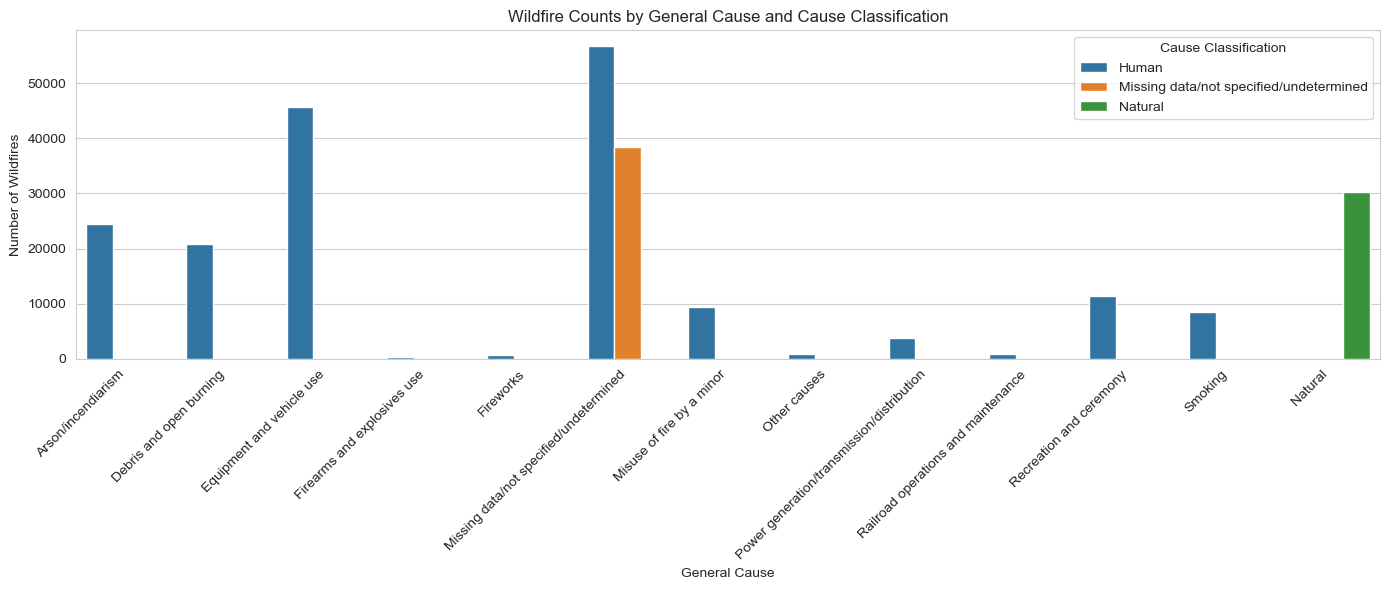

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by both classification and general cause, then count
cause_counts = frap_df.groupby(['NWCG_CAUSE_CLASSIFICATION', 'NWCG_GENERAL_CAUSE']).size().reset_index(name='count')

# Set plot size and style
plt.figure(figsize=(14, 6))
sns.set_style("whitegrid")

# Create a grouped barplot
sns.barplot(
    data=cause_counts,
    x='NWCG_GENERAL_CAUSE',
    y='count',
    hue='NWCG_CAUSE_CLASSIFICATION'
)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Add labels and title
plt.xlabel("General Cause")
plt.ylabel("Number of Wildfires")
plt.title("Wildfire Counts by General Cause and Cause Classification")
plt.tight_layout()
plt.legend(title="Cause Classification")
plt.show()


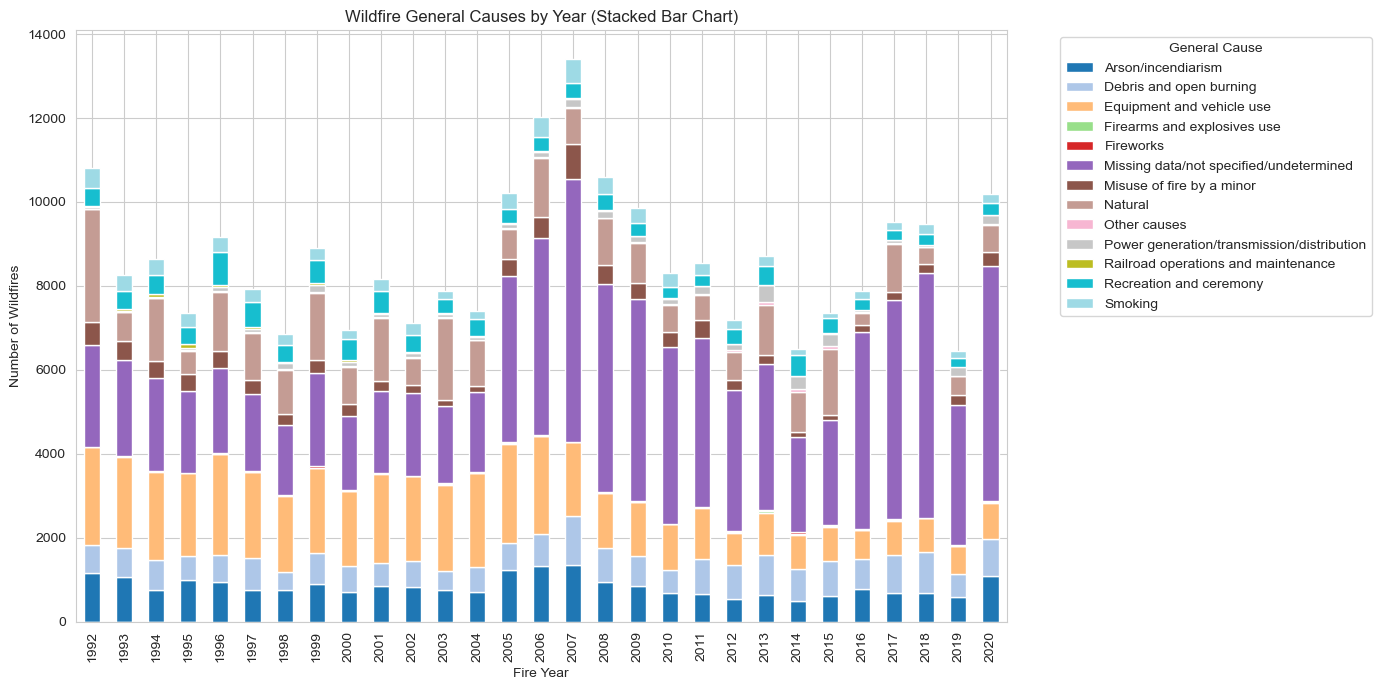

In [17]:
import matplotlib.pyplot as plt
import pandas as pd

# Group by year and general cause, count occurrences
yearly_cause_counts = frap_df.groupby(['FIRE_YEAR', 'NWCG_GENERAL_CAUSE']).size().unstack(fill_value=0)

# Plot the stacked bar chart
yearly_cause_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='tab20')

# Add labels and title
plt.xlabel("Fire Year")
plt.ylabel("Number of Wildfires")
plt.title("Wildfire General Causes by Year (Stacked Bar Chart)")
plt.legend(title="General Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

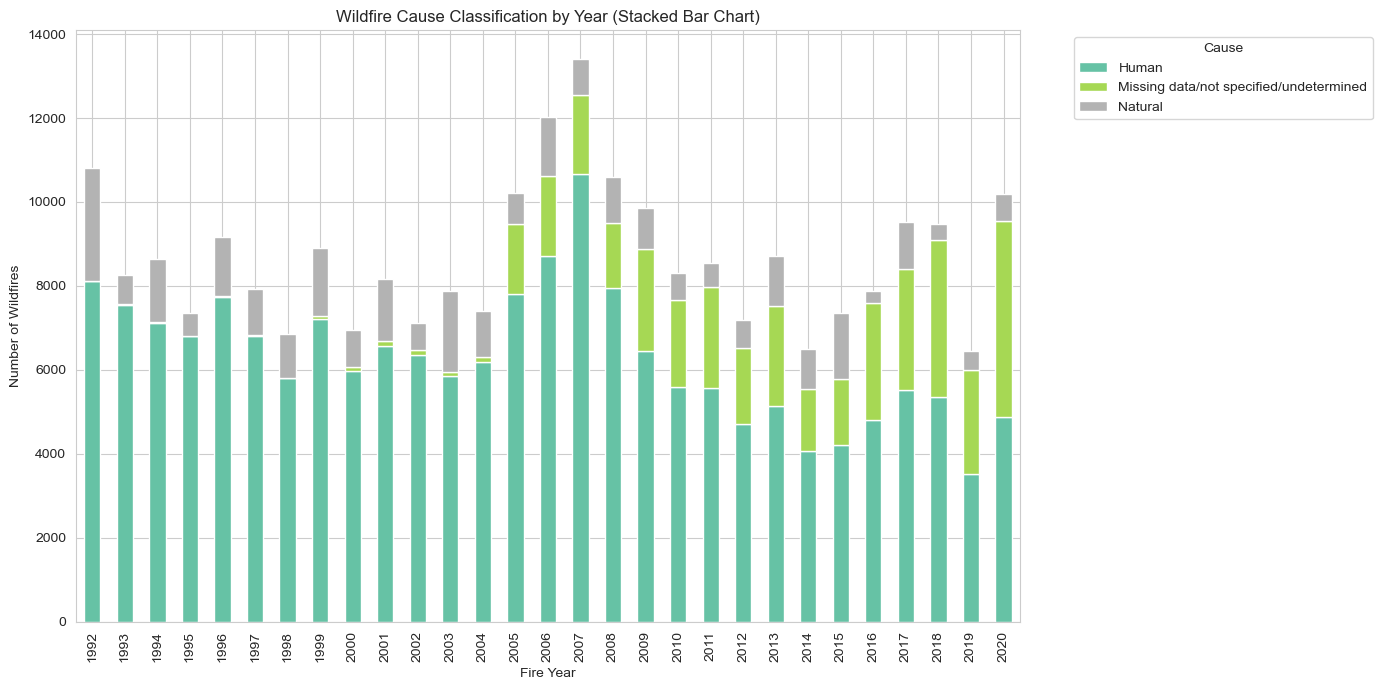

In [18]:
import matplotlib.pyplot as plt

# Group by FIRE_YEAR and cause (NWCG_CAUSE_CLASSIFICATION), then count
yearly_class_counts = frap_df.groupby(['FIRE_YEAR', 'NWCG_CAUSE_CLASSIFICATION']).size().unstack(fill_value=0)

# Plot
yearly_class_counts.plot(kind='bar', stacked=True, figsize=(14, 7), colormap='Set2')

# Add labels and formatting
plt.xlabel("Fire Year")
plt.ylabel("Number of Wildfires")
plt.title("Wildfire Cause Classification by Year (Stacked Bar Chart)")
plt.legend(title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

C:\Users\annis\anaconda3\Lib\site-packages\IPython\core\events.py:82: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\annis\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


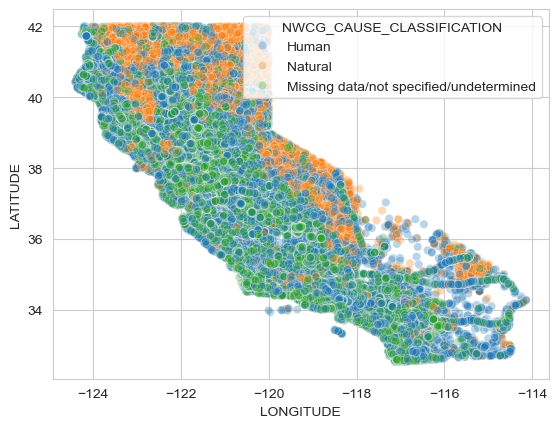

In [19]:
sns.scatterplot(data=frap_df, x='LONGITUDE', y='LATITUDE', hue='NWCG_CAUSE_CLASSIFICATION', alpha=0.3)

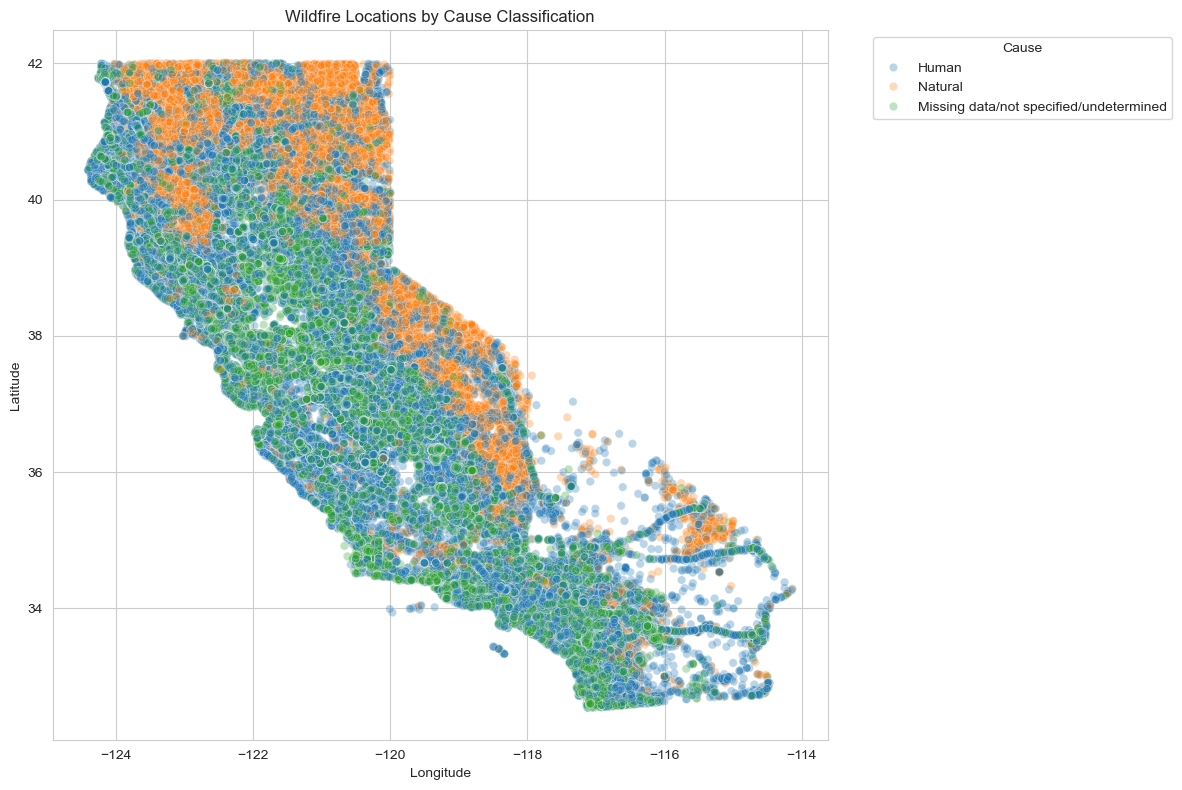

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Increase the figure size
plt.figure(figsize=(12, 8))  # You can change to (15, 10) or larger if needed

# Create the scatter plot
sns.scatterplot(
    data=frap_df,
    x='LONGITUDE',
    y='LATITUDE',
    hue='NWCG_CAUSE_CLASSIFICATION',
    alpha=0.3
)

# Add title and labels (optional)
plt.title("Wildfire Locations by Cause Classification")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

plt.legend(title="Cause", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

<Axes: xlabel='FIRE_YEAR'>

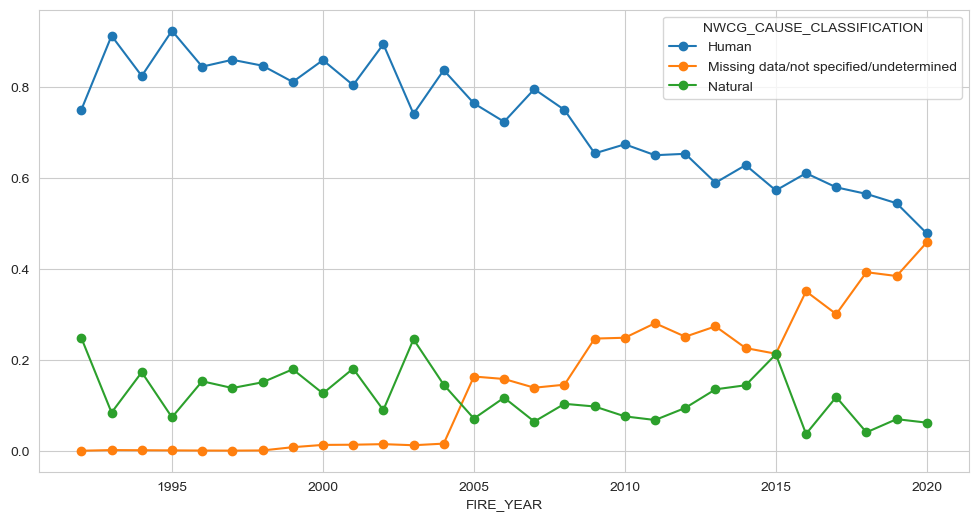

In [21]:
yearly_props = yearly_class_counts.divide(yearly_class_counts.sum(axis=1), axis=0)
yearly_props.plot(kind='line', figsize=(12,6), marker='o')

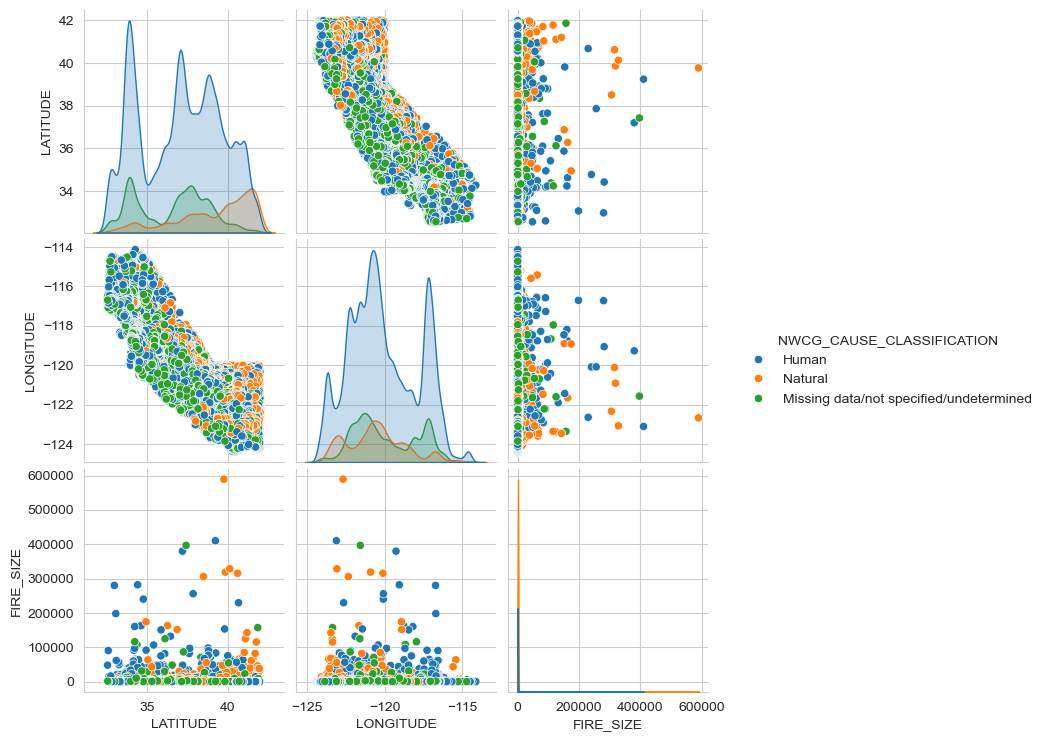

In [23]:
sns.pairplot(frap_df[['LATITUDE', 'LONGITUDE', 'FIRE_SIZE', 'NWCG_CAUSE_CLASSIFICATION']], hue='NWCG_CAUSE_CLASSIFICATION')